Fiat Tuning: Tune functions
===========================

Introduction
------------

Fiatlight provides you with powerful tools to visually debug the intermediate states of your function.

By adding a fiat_tuning attribute to a function, you can provide additional information that will be displayed in the GUI node for this function. This attribute is a dictionary and can contain named data values or descendants of AnyDataWithGui. This information can be used to fine-tune the function, debug it, or visualize intermediate states.

Moreover, this information can be updated in the GUI, even if the function is a long-running process called asynchronously.

> _Example: The image below shows a sort competition between different algorithms. The GUI nodes display in real time the evolving state of each algorithm, using "fiat_tuning"._
>
> _See "Advanced Video Tutorial: Sort Algorithm Visualizer" below for more details._
>
> <a href="https://share.descript.com/view/oBub1WN28bX" target="_blank">
> <img src="_static/images/video_fl_sort.jpg" width="300" />
> </a>



Example: Measure Execution Time
-------------------------------

In the example below, we will add a simple float into the fiat_tuning attribute of the sort_list function. This float will represent the duration of the sort operation.

The collapsible region "Fiat Tuning" will display this duration:we can see that in this example, it takes about 0.75 seconds to sort a list of 10,000,000 elements.

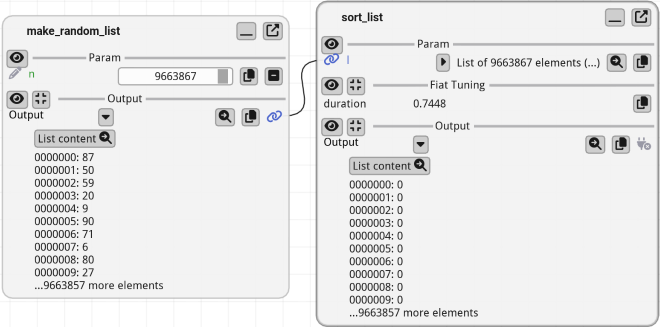

In [2]:
import fiatlight as fl
import time

@fl.with_fiat_attributes(n__range=(1, 10_000_000))
def make_random_list(n: int) -> list[int]:
    import random
    return [random.randint(0, 100) for _ in range(n)]


def sort_list(l: list[int]) -> list[int]:
    start = time.time()
    r = sorted(l)
    duration = time.time() - start
    fl.add_fiat_attributes(sort_list, fiat_tuning={"duration": duration})
    return r

fl.run([make_random_list, sort_list], app_name="Sort duration")

Example: Tune using an Image
----------------------------

The fiat_tuning attribute can also be used to display widgets (which must be descendants of AnyDataWithGui) in the GUI node.

In the example below, we will add an image widget (ImageWithGui) into the fiat_tuning attribute.

> _[demos/images/toon_edges.py](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/demos/images/toon_edges.py) is a good example of how to use the `fiat_tuning` attribute._
>
> _`add_toon_edges` is a complex function that adds a toon effect to an image, by adding colored edges to the image contours._
> _The contour detection is extremely sensitive to the parameters, and the `fiat_tuning` attribute is used to display the intermediate states of the function in the GUI._

Here are some commented extracts of the function:

In [3]:
from fiatlight.fiat_kits.fiat_image import ImageU8_3, ImageU8_1

def add_toon_edges(
image: ImageU8_3,
# ... lots of parameters ...
) -> ImageU8_3:
    edges: ImageU8_1 # = ...             (compute the edges)
    dilated_edges: ImageU8_1 #  = ...    (dilate the edges)
    image_with_edges: ImageU8_3  # = ... (superimpose the edges on the image)

    # fiat_tuning: add debug internals to ease fine-tuning the function inside the node
    from fiatlight.fiat_kits.fiat_image import ImageWithGui

    # Add to fiat_tuning any variable you want to be able to fine-tune or debug in the function node
    #     * Either a raw type (int, float, str, etc.): see durations
    #     * Or a descendant of AnyDataWithGui: see "canny", "dilate", "image_with_edges"
    fl.add_fiat_attributes(add_toon_edges, fiat_tuning={
        "duration_canny": duration_canny,
        "duration_dilate": duration_dilate,
        "duration_blur": duration_blur,
        "duration_merge": duration_merge,
        "canny": ImageWithGui(edges),
        "dilate": ImageWithGui(dilated_edges),
        "image_with_edges": ImageWithGui(image_with_edges),
    })

    # return the image with edges
    return image_with_edges

Once these internals are set, you can see the function "Internals" in the GUI:

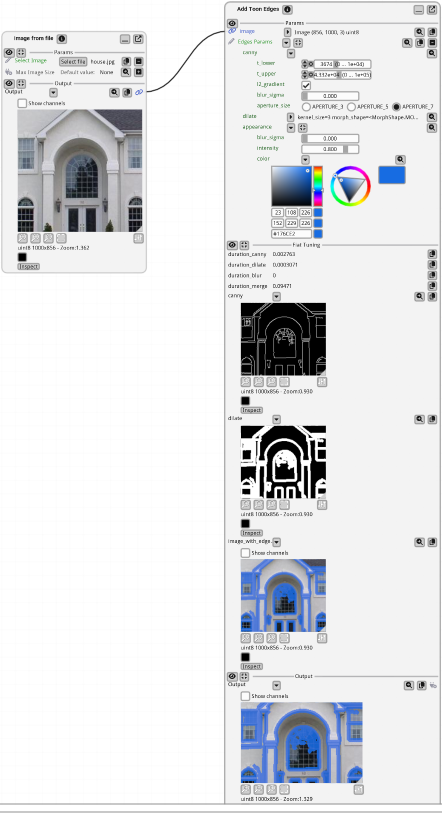

In [4]:
import fiatlight as fl
from fiatlight.fiat_kits.fiat_image import ImageU8_GRAY, ImageU8_3, image_source
from fiatlight.demos.images.toon_edges import add_toon_edges

fl.run([image_source, add_toon_edges], app_name="Toon edges")

> _The image above shows the GUI node for the toon_edges function, with the expanded "Fiat Tuning" section:_
> _it displays the execution time of each step, as well as an image representation of the intermediate edges and dilated edges._


Debugging Functions exceptions
==============================

When a function raises an exception, Fiatlight catches and displays it without crashing the application. Instead, you will see a "Debug this exception" button that you can use to trigger the exception again.

This feature is invaluable for debugging and making your functions more robust. If you are using a debugger, you will be taken directly to the point where the exception occurred, with the correct inputs to reproduce the bug.

> _Note: this feature can be disabled with:
>     `fl.get_fiat_config().run_config.catch_function_exceptions = False`


Example: a Math Exception
-------------------------

With this setup, if the input value of a causes math.log(cos_a) to produce an error (when cos_a is negative).

Fiatlight will catch and display the exception, allowing you to debug it easily.

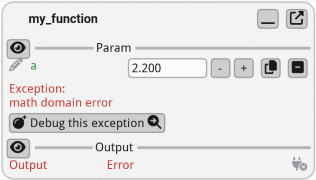

In [5]:
import fiatlight as fl
import math

def my_function(a: float) -> float:
    cos_a = math.cos(a)
    r = math.log(cos_a)
    return r

fl.run(my_function, app_name="Math domain exception")